# Data Analysis using Python

In this educational project we want to analyze if happiness or the consumption of alcohol in a country have an influence on their life expectancy. This analysis is based on two data sets which can be found here:

Data about the Happiness Score: https://www.kaggle.com/marcospessotto/happiness-and-alcohol-consumption 

Data about the consumption of alcohol and life expectancy: https://www.kaggle.com/kumarajarshi/life-expectancy-who 


## Importing needed modules

In [1]:
import pandas as pd
import csv
import numpy as np

## Loading and cleaning the first dataset

In [2]:
df_LED = pd.read_csv(
    "data/LifeExpectancyData.csv",
    header=None, sep=",")

df_LED.columns = [
    "Country","Year","Status","LifeExpectancy" ,"Adult Mortality","infant deaths",
    "Alcohol","percentage expenditure","Hepatitis B","Measles" , "BMI" ,"under-five deaths",
    "Polio","Total expenditure","Diphtheria" , "HIV/AIDS","GDP","Population",
    "thinness 1-19 years", "thinness 5-9 years","Income composition of resources","Schooling"
]

# Only keeping relevant columns
reduce_LED = df_LED.filter(['Country','LifeExpectancy', 'Alcohol'], axis=1) 

# Remove all NaN-values
clean_LED = reduce_LED.dropna() 

# Group the countries, so there's only one row for each country and calculate the mean of the other values
group_LED = clean_LED.groupby('Country', as_index=False).mean() 

# Saving the cleaned data set
group_LED.to_csv (r'.\data\LifeExpectancyData_cleaned.csv', index = True, header=True)

print("First five entries of the cleaned data set 'LifeExpectancyData.csv':\n\n", group_LED[:5])

First five entries of the cleaned data set 'LifeExpectancyData.csv':

                Country  LifeExpectancy   Alcohol
0          Afghanistan       58.193750  0.014375
1              Albania       75.156250  4.848750
2              Algeria       73.486667  0.406667
3               Angola       48.793333  5.740667
4  Antigua and Barbuda       74.966667  7.949333


## Loading and cleaning the second data set

In [3]:
df_HAC = pd.read_csv(
    "data/HappinessAlcoholConsumption.csv",
    header=None, sep=",")

df_HAC.columns = [
    "Country","Region","Hemisphere","HappinessScore","HDI","GDP_PerCapita","Beer_PerCapita","Spirit_PerCapita","Wine_PerCapita"
]

# Only keeping relevant columns
reduce_HAC = df_HAC.filter(['Country','HappinessScore'], axis=1)

# Remove all NaN-values
clean_HAC = reduce_HAC.dropna()

# Saving the cleaned data set
clean_HAC.to_csv (r'.\data\HappinessAlcoholConsumption_cleaned.csv', index = True, header=True)

print("First five entries of the cleaned data set 'HappinessAlcoholConsumption.csv':\n\n", clean_HAC[:5])

First five entries of the cleaned data set 'HappinessAlcoholConsumption.csv':

        Country  HappinessScore
0      Denmark           7.526
1  Switzerland           7.509
2      Iceland           7.501
3       Norway           7.498
4      Finland           7.413


## Merging the data sets

In [4]:
# Merge the two data sets on the 'Country' Attribute and only keep entries which are represented in both datasets
merged_data = pd.merge(group_LED, clean_HAC, on='Country') 

# Saving the merged and cleaned data set
merged_data.to_csv (r'.\data\merged_and_cleaned.csv', index = True, header=True)

print("First five entries of the merged data set:\n\n", merged_data[:5])

First five entries of the merged data set:

      Country  LifeExpectancy    Alcohol  HappinessScore
0    Albania       75.156250   4.848750           4.655
1     Angola       48.793333   5.740667           3.866
2  Argentina       75.080000   7.966667           6.650
3    Armenia       73.306667   3.702667           4.360
4  Australia       81.746667  10.155333           7.313


### Quality Check for Validity

In [11]:
counter = len(merged_data) 

# If there is any entry which doesn't have the right type, decrease the counter
for i in range (0, len(merged_data)):
    if type(merged_data["Country"][i]) != str or type(merged_data["LifeExpectancy"][i]) != np.float64 or type(merged_data["Alcohol"][i]) != np.float64 or type(merged_data["HappinessScore"][i]) != np.float64:
        counter -= 1

# If the counter wasn't decreased, all entries are valid 
if counter == len(merged_data):
    print("Validity check completed. All entries are \033[1mvalid.")
else: 
    print("Validity check completed. Some entries are \033[1minvalid.")

Validity check completed. All entries are valid.


# Simple Linear Regression

The implementation of the simple linear regression is based on this example: https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

Text(0.5, 1.0, '\nLife Expectancy and Alcohol\n')

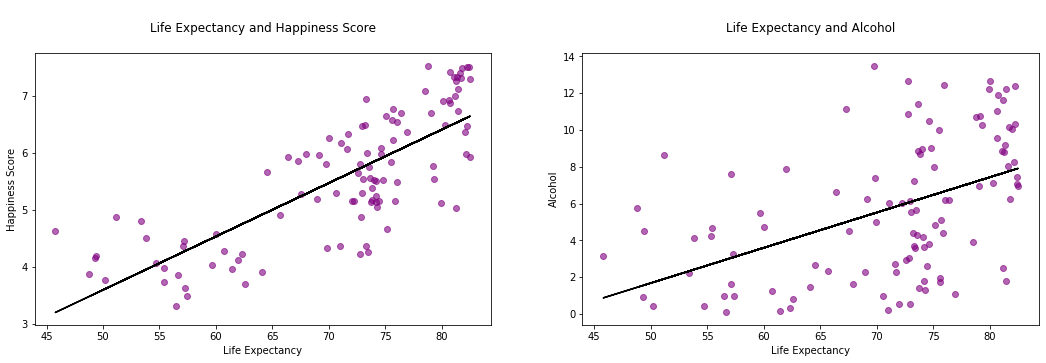

In [16]:
import matplotlib.pyplot as plt  # Used to visualize the regression
from sklearn.linear_model import LinearRegression # Used to perform the linear regression

# Converting the values of the attributes to 2-dimensional numpy arrays
x_lr = merged_data.iloc[:, 2].values.reshape(-1, 1)  # Alcohol
y_lr = merged_data.iloc[:, 1].values.reshape(-1, 1)  # Life Expectancy
z_lr = merged_data.iloc[:, 3].values.reshape(-1, 1)  # Happiness Score

fig, m_axs = plt.subplots(1,2, figsize = (18,5))

### Life Expectancy and Happiness Score ###

linear_regressor = LinearRegression() 

# Training the linear regression model with the data about life expectancies and happiness scores
fitted_yz = linear_regressor.fit(y_lr, z_lr)  

# Predicting values of the happiness score based on the life expectancy
Y_pred = fitted_yz.predict(y_lr)  

# Visualization

# Placing the points with the given coordinates (x,y) where x equals the values of the life expectancy 
# and y equals the values of the happiness score
m_axs[0].scatter(y_lr, z_lr, color='purple', alpha=0.6,  marker='o')

# Plotting the regression line based on the predicted happiness score values and the life expectancy
m_axs[0].plot(y_lr, Y_pred, color='black')


m_axs[0].set_xlabel('Life Expectancy') 
m_axs[0].set_ylabel('Happiness Score') 
m_axs[0].set_title('\nLife Expectancy and Happiness Score\n')


### Life Expectancy and Alcohol ### 

fitted_xy = linear_regressor.fit(y_lr, x_lr)

Y_pred2 = fitted_xy.predict(y_lr)

m_axs[1].scatter(y_lr, x_lr, color='purple', alpha=0.6,  marker='o')
m_axs[1].plot(y_lr, Y_pred2, color='black')
m_axs[1].set_xlabel('Life Expectancy') 
m_axs[1].set_ylabel('Alcohol') 
m_axs[1].set_title('\nLife Expectancy and Alcohol\n')

# Multiple Linear Regresssion

The implementation of the multiple linear regression is based on this example: https://github.com/krishnaik06/Visualize-Multiple-Linear-Regression/blob/master/multiplelinear.py

## Understanding the output

To achieve a better understanding of the 3D plot the values can be modified to see a changes and dependencies.

In [7]:
# for p in range(0,len(merged_data)):
#     if merged_data['HappinessScore'][p] > 6.0:
#         merged_data['Alcohol'][p] = 10
        
# for s in range(0,len(merged_data)):
#     if merged_data['HappinessScore'][s] < 5.0:
#         merged_data['LifeExpectancy'][s] = 80

## Implementation

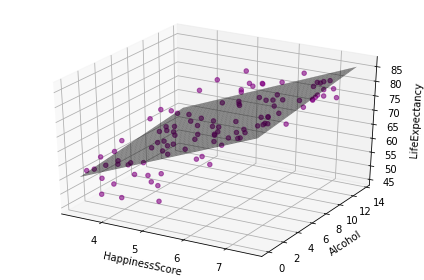

In [10]:
import statsmodels.formula.api as smf # Used to calculate the needed coordinates for the regression
from mpl_toolkits.mplot3d import Axes3D # Used to plot a 3d model

# Calculating the needed values for the regression
model = smf.ols(formula='LifeExpectancy ~ HappinessScore + Alcohol', data=merged_data) 

# Training the model with the calculated data
results_formula = model.fit()

# Setting the coordinates for the plotted surface by creating matrices including the min and max values
# of Happiness/Alcohol and 100 equally distributed values in those intervals
x_surface, y_surface = np.meshgrid(np.linspace(merged_data.HappinessScore.min(), merged_data.HappinessScore.max(), 100), 
                             np.linspace(merged_data.Alcohol.min(), merged_data.Alcohol.max(), 100))

# Creating a dataframe including the priorly calculated values
df_xy = pd.DataFrame({'HappinessScore': x_surface.ravel(), 'Alcohol': y_surface.ravel()}) 

# Predicting values of life expectancy based on the happiness score and alcohol consumption
Z_pred=np.array(results_formula.predict(exog=df_xy))

# Converting it to the same matrix layout as the values of happiness and alcohol consumption
z_surface = Z_pred.reshape(x_surface.shape)

# Visualization
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

# Placing the points with the given coordinates (x,y,z) where x equals the values of the happiness score
# y equals the values of the alcohol consumption and z equals the values of life exptectancy
ax.scatter(merged_data['HappinessScore'],merged_data['Alcohol'],merged_data['LifeExpectancy'],c='purple', marker='o', alpha=0.6)

# Plotting the regression surface 
ax.plot_surface(x_surface,y_surface,z_surface, color='black', alpha=0.5)

ax.set_xlabel('HappinessScore')
ax.set_ylabel('Alcohol')
ax.set_zlabel('LifeExpectancy')
plt.tight_layout() 